In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### Background												
This is a sample of individual bank statement transactions from 20 small business merchants (indexed by Lead ID) from various industries 												
Each merchant could have multiple accounts (bank account id) over multiple months												
Transactions may be debits (withdrawals) or credits (deposits)												
Each transaction also has a description												


In [2]:
df = pd.read_excel('Data.xlsx')

In [3]:
df.shape

(29029, 11)

In [4]:
df.tail(5)

,Lead ID,bankid,bank_account_id,account_number,Industry,post_date,description,transaction_type,amount,running_balance,trans_order
29024,330698,8545,14374,1693,Health Care and Social Assistance,2017-02-06,Wire transfer withdrawal JANABI ASSOCIATE S IN...,debit,8399.62,40396.91,7
29025,330698,8545,14374,1693,Health Care and Social Assistance,2017-02-07,ACH deposit BANKCARD BTOT DEP PERSONA DOCTORS-...,credit,42573.44,59356.56,2
29026,330698,8545,14374,1693,Health Care and Social Assistance,2017-02-07,ACH Withdrawal DISCOVER E-PAYMENT ALHAYEN ALYA...,debit,19649.80,39002.21,4
29027,330698,8545,14374,1693,Health Care and Social Assistance,2017-02-07,ACH Withdrawal NEW LOGIC (877) PREAUTHPMT PERS...,debit,704.55,58652.01,3
29028,330698,8545,14374,1693,Health Care and Social Assistance,2017-02-07,Wire transfer withdrawal JANABI ASSOCIATE S IN...,debit,11819.09,16783.12,1


In [5]:
df.columns

Index(['Lead ID', 'bankid', 'bank_account_id', 'account_number', 'Industry',
       'post_date', 'description', 'transaction_type', 'amount',
       'running_balance', 'trans_order'],
      dtype='object')

In [6]:
df.rename(columns = {'Lead ID':'Lead_ID'}, inplace = True) 

### 1. Count the number of merchants, bank accounts and tabulate:												
(i) the number of bank accounts for each merchant												
(ii) the number of months of each bank account for which data is available												
(iii) the total number of credits (deposits), debits (withdrawals) and their averages per month for each bank account and each merchant												
(iv) the total dollar value of credits, debits and their averages per month for each bank account and each merchant												
(v) Aggregate the answers to (iii) and (iv) at the merchant level, industry level and bankid level												


### (i) the number of bank accounts for each merchant

In [7]:
df2 = df[['Lead_ID','bank_account_id']].drop_duplicates()
x = df2['Lead_ID'].value_counts()
tab = pd.DataFrame(x)
tab = tab.rename(columns = {'Lead_ID':'Number_of_Bank_Accounts'})
tab

,Number_of_Bank_Accounts
321380,8
318465,7
316728,6
312745,5
321356,5
326062,3
321146,2
314559,2
310443,2
323253,2


In [8]:
df["Industry"].unique()

array(['Accommodation and Food Services', 'Construction',
       'Professional, Scientific, and Technical Services', 'Retail Trade',
       'Information Technology', 'Health Care and Social Assistance',
       'Agriculture, Forestry, Fishing and Hunting',
       'Other Services (except Public Administration)',
       'Finance and Insurance', 'Educational Services'], dtype=object)

In [9]:
df["Lead_ID"].unique()

array([308148, 310443, 312745, 313082, 314036, 314559, 316728, 318465,
       321146, 321218, 321356, 321380, 321671, 323253, 325142, 325330,
       326050, 326062, 328212, 329803, 330698], dtype=int64)

### (ii) the number of months of each bank account for which data is available

In [10]:
df['year'] = pd.DatetimeIndex(df['post_date']).year
df['month'] = pd.DatetimeIndex(df['post_date']).month
df['month_year'] = pd.to_datetime(df['post_date']).dt.to_period('M')

In [11]:
df.head(1)

,Lead_ID,bankid,bank_account_id,account_number,Industry,post_date,description,transaction_type,amount,running_balance,trans_order,year,month,month_year
0,308148,8535,12460,xxxx9928,Accommodation and Food Services,2016-03-10,DEPOSIT ID NUMBER xx6836,credit,5000.0,5671.4,1,2016,3,2016-03


In [12]:
y_ta = df.groupby('bank_account_id')['month_year'].nunique()
y_tab = pd.DataFrame(y_ta)
y_tab = y_tab.rename(columns = {'month_year':'No._of_months_data_available'})
y_tab

,No._of_months_data_available
bank_account_id,
12460,10
12654,7
12655,12
12835,5
12836,5
12837,1
12838,11
12839,13
13226,11


### (iii) the total number of credits (deposits), debits (withdrawals) and their averages per month for each bank account and each merchant

#### Total number of credits for each merchant

In [13]:
credit = df[df.transaction_type == "credit"]
credit[["Lead_ID","bank_account_id","amount"]]
credit['Lead_ID'].value_counts()

321380    4939
326062     852
321356     697
321671     642
318465     369
330698     346
325330     312
323253     308
316728     298
328212     282
314036     276
326050     190
308148     172
312745     160
314559     143
321146     121
329803     116
325142     115
313082     112
321218      57
310443      35
Name: Lead_ID, dtype: int64

#### Total number of credits for bank account 

In [14]:
credit = df[df.transaction_type == "credit"]
credit[["Lead_ID","bank_account_id","amount"]]
credit['bank_account_id'].value_counts()

14636    2303
14637    2047
14629     642
14046     431
14044     421
15146     389
14374     346
15002     312
13879     291
14981     282
13226     276
14206     190
13419     178
12460     172
15142     154
14633     152
13271     135
14632     125
14339     116
14049     115
12839     114
15144     114
14630     113
14631     113
13233     112
13232     110
13230      85
13970      66
13425      60
14779      57
13422      57
13971      55
14634      43
14635      43
13423      41
13234      35
12838      35
13272      30
13424      29
12654      27
15147      21
13228      21
15148      19
13235      17
13877      17
12655       8
13273       8
12835       7
13420       4
12836       3
12837       1
Name: bank_account_id, dtype: int64

#### Total number of debit for each merchant

In [15]:
debit = df[df.transaction_type == "debit"]
debit[["Lead_ID","bank_account_id","amount"]]
debit['Lead_ID'].value_counts()

316728    2314
314036    1985
321671    1788
318465    1694
326062    1443
313082    1026
330698     906
325142     876
321218     849
321356     788
321380     773
329803     655
312745     600
326050     459
321146     454
323253     425
328212     345
308148     320
314559     284
325330     257
310443     246
Name: Lead_ID, dtype: int64

### Total number of debits for bank account

In [16]:
debit = df[df.transaction_type == "debit"]
debit[["Lead_ID","bank_account_id","amount"]]
debit['bank_account_id'].value_counts()

13226    1985
14629    1788
13232    1598
13419    1183
13233    1026
14374     906
14049     876
14779     849
14046     837
14339     655
14044     604
12839     537
14206     459
13228     458
13879     418
15146     395
13970     355
14637     348
14981     345
12460     320
13271     280
15002     257
15142     250
14636     233
12654     223
13234     160
13423     150
13422     143
13425     141
15144     121
13971      99
13272      93
13424      71
14634      54
14635      52
12838      47
14630      29
14633      29
12655      23
14631      15
14632      13
15147      12
12835      11
15148      10
13877       7
12836       5
13420       4
13273       4
13235       3
13230       2
13421       2
14045       2
Name: bank_account_id, dtype: int64

## Average number of credit amount and count per customer/merchant each month

In [17]:
df3 =  df[df.transaction_type == "credit"]

In [18]:
df3['month'] = pd.DatetimeIndex(df3['post_date']).month

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
Avg_per_month = df3[["Lead_ID","bank_account_id","amount" , "month"]]

In [20]:
Avg_per_month["month"].value_counts()

1     1068
10    1007
8     1006
9      986
11     909
6      897
7      892
2      848
5      824
12     773
4      691
3      641
Name: month, dtype: int64

In [21]:
Avg_per_month.head(4)

,Lead_ID,bank_account_id,amount,month
0,308148,12460,5000.00,3
1,308148,12460,16.00,3
2,308148,12460,1000.00,3
17,308148,12460,27.62,3


In [22]:
ft = Avg_per_month.groupby(["Lead_ID" ,"month"])[["amount"]].mean()
ft.head(20)

amount
Lead_ID month              
308148  3       1219.724000
        4       1500.000000
        5        193.737500
        6        592.345000
        7        405.252000
        8        362.685263
        9        233.456563
        10       229.331250
        11       569.067879
        12       130.850000
310443  2        112.370000
        5       2515.427500
        6      14788.042222
        7       4825.000000
        8       6388.860000
        9      13602.772500
        10     18100.830000
        11      4205.005000
        12      3525.000000
312745  1       3590.625000

## AVERAGE COUNT

In [23]:
df_count = Avg_per_month.groupby('Lead_ID')['month'].nunique()
df_count = pd.DataFrame(df_count)
df_count

,month
Lead_ID,
308148,10
310443,9
312745,12
313082,10
314036,11
314559,12
316728,12
318465,9
321146,9


In [24]:
credit = df[df.transaction_type == "credit"]
credit[["Lead_ID","bank_account_id","amount" , "post_date"]]
credit['Lead_ID'].value_counts()
count = pd.DataFrame(credit['Lead_ID'].value_counts())
count_df = pd.concat([count ,df_count ] , axis = 1)
count_df["averge_count"] = count_df["Lead_ID"]/count_df["month"]
count_df.head()

,Lead_ID,month,averge_count
308148,172,10,17.200000
310443,35,9,3.888889
312745,160,12,13.333333
313082,112,10,11.200000
314036,276,11,25.090909


## Average number of credit amount and count per bank account each month

In [25]:
ft_bankid = Avg_per_month.groupby(["bank_account_id" ,"month"])[["amount"]].mean()
ft_bankid.head(20)

amount
bank_account_id month              
12460           3       1219.724000
                4       1500.000000
                5        193.737500
                6        592.345000
                7        405.252000
                8        362.685263
                9        233.456563
                10       229.331250
                11       569.067879
                12       130.850000
12654           5       2515.427500
                6      18980.408571
                7       4825.000000
                8       6457.402500
                9      18130.363333
                10     18100.830000
                11      5603.340000
12655           2        112.370000
                6        114.760000
                8       6251.775000

## Average count

In [26]:
df_count_bid = Avg_per_month.groupby('bank_account_id')['month'].nunique()
df_countbid = pd.DataFrame(df_count_bid)
df_countbid.head(5)

,month
bank_account_id,
12460,10
12654,7
12655,6
12835,4
12836,2


In [27]:
credit = df[df.transaction_type == "credit"]
credit[["Lead_ID","bank_account_id","amount","post_date"]]
credit['bank_account_id'].value_counts()
counting = pd.DataFrame(credit['bank_account_id'].value_counts())
counting_df = pd.concat([counting ,df_countbid ] , axis = 1)
counting_df["averge_count_of_bank_id"] = counting_df["bank_account_id"]/counting_df["month"]
counting_df.head()

,bank_account_id,month,averge_count_of_bank_id
12460,172,10,17.200000
12654,27,7,3.857143
12655,8,6,1.333333
12835,7,4,1.750000
12836,3,2,1.500000


## Average number of debit amount per customer/merchant each month

In [28]:
df_debit =  df[df.transaction_type == "debit"]
df_debit.head(2)

,Lead_ID,bankid,bank_account_id,account_number,Industry,post_date,description,transaction_type,amount,running_balance,trans_order,year,month,month_year
3,308148,8535,12460,xxxx9928,Accommodation and Food Services,2016-03-21,WAL-MART #0880 IRVING TXxx6007 03/20,debit,1015.50,4671.90,2,2016,3,2016-03
4,308148,8535,12460,xxxx9928,Accommodation and Food Services,2016-03-22,CHECK OR SUPPLY ORDERPPD ID: xxxxxx6800,debit,27.62,5644.28,1,2016,3,2016-03


In [29]:
df_debit['month'] = pd.DatetimeIndex(df_debit['post_date']).month


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
Avg_per_month_debit = df3[["Lead_ID","bank_account_id","amount" , "month"]]
# Avg_per_month["month"].value_counts()
Avg_per_month_debit.head(4)

,Lead_ID,bank_account_id,amount,month
0,308148,12460,5000.00,3
1,308148,12460,16.00,3
2,308148,12460,1000.00,3
17,308148,12460,27.62,3


In [31]:
ft_debit = Avg_per_month_debit.groupby(["Lead_ID" ,"month"])[["amount"]].mean()
ft_debit.head(20)

amount
Lead_ID month              
308148  3       1219.724000
        4       1500.000000
        5        193.737500
        6        592.345000
        7        405.252000
        8        362.685263
        9        233.456563
        10       229.331250
        11       569.067879
        12       130.850000
310443  2        112.370000
        5       2515.427500
        6      14788.042222
        7       4825.000000
        8       6388.860000
        9      13602.772500
        10     18100.830000
        11      4205.005000
        12      3525.000000
312745  1       3590.625000

## Average count

In [32]:
df_debit_count_bid = Avg_per_month_debit.groupby('Lead_ID')['month'].nunique()
df_debit_count_bid = pd.DataFrame(df_debit_count_bid)
df_debit_count_bid.head(5)

,month
Lead_ID,
308148,10
310443,9
312745,12
313082,10
314036,11


In [33]:
debit = df[df.transaction_type == "debit"]
debit[["Lead_ID","bank_account_id","amount","post_date"]]
debit['Lead_ID'].value_counts()
counting_ = pd.DataFrame(debit['Lead_ID'].value_counts())
counting__df = pd.concat([counting_ ,df_debit_count_bid ] , axis = 1)
counting__df["averge_count_per_customer"] = counting__df["Lead_ID"]/counting__df["month"]
counting__df.head()

,Lead_ID,month,averge_count_per_customer
308148,320,10,32.000000
310443,246,9,27.333333
312745,600,12,50.000000
313082,1026,10,102.600000
314036,1985,11,180.454545


## Average number of debit amount per bank account each month

In [34]:
ft_debit_bankid = Avg_per_month_debit.groupby(["bank_account_id" ,"month"])[["amount"]].mean()
ft_debit_bankid.head(20)

amount
bank_account_id month              
12460           3       1219.724000
                4       1500.000000
                5        193.737500
                6        592.345000
                7        405.252000
                8        362.685263
                9        233.456563
                10       229.331250
                11       569.067879
                12       130.850000
12654           5       2515.427500
                6      18980.408571
                7       4825.000000
                8       6457.402500
                9      18130.363333
                10     18100.830000
                11      5603.340000
12655           2        112.370000
                6        114.760000
                8       6251.775000

### Average count

In [35]:
df_debit_count_bid = Avg_per_month_debit.groupby('bank_account_id')['month'].nunique()
df_debit_count_bid = pd.DataFrame(df_debit_count_bid)
df_debit_count_bid.head(5)

,month
bank_account_id,
12460,10
12654,7
12655,6
12835,4
12836,2


In [36]:
debit = df[df.transaction_type == "debit"]
debit[["Lead_ID","bank_account_id","amount","post_date"]]
debit['bank_account_id'].value_counts()
counting_id = pd.DataFrame(debit['bank_account_id'].value_counts())
counting_bid_df = pd.concat([counting_id ,df_debit_count_bid ] , axis = 1)
counting_bid_df["averge_count_of_bankidr"] = counting_bid_df["bank_account_id"]/counting_bid_df["month"]
counting_bid_df.head()

,bank_account_id,month,averge_count_of_bankidr
12460,320.0,10.0,32.000000
12654,223.0,7.0,31.857143
12655,23.0,6.0,3.833333
12835,11.0,4.0,2.750000
12836,5.0,2.0,2.500000


In [37]:
ft_debit_bankid.columns

Index(['amount'], dtype='object')

In [38]:
df.groupby([df["transaction_type"],df["Lead_ID"]])[["post_date"]].agg(["count"])


post_date
                             count
transaction_type Lead_ID          
credit           308148        172
                 310443         35
                 312745        160
                 313082        112
                 314036        276
                 314559        143
                 316728        298
                 318465        369
                 321146        121
                 321218         57
                 321356        697
                 321380       4939
                 321671        642
                 323253        308
                 325142        115
                 325330        312
                 326050        190
                 326062        852
                 328212        282
                 329803        116
                 330698        346
debit            308148        320
                 310443        246
                 312745        600
                 313082       1026
                 314036       1985
                 314559        284
                 316728       2314
                 318465       1694
                 321146        454
                 321218        849
                 321356        788
                 321380        773
                 321671       1788
                 323253        425
                 325142        876
                 325330        257
                 326050        459
                 326062       1443
                 328212        345
                 329803        655
                 330698        906

In [39]:
df.groupby([df["post_date"],df["Lead_ID"]])[["transaction_type"]].agg(["count"])

transaction_type
                              count
post_date  Lead_ID                 
2015-11-30 312745                 3
2015-12-01 312745                 7
2015-12-02 312745                 3
2015-12-03 312745                 1
2015-12-04 310443                 1
...                             ...
2017-03-10 325330                 2
           328212                 4
2017-03-13 328212                 9
2017-03-14 328212                 2
2017-03-15 328212                 6

[4048 rows x 1 columns]

# (iv) the total dollar value of credits, debits and their averages per month for each bank account and each merchant

### Average and sum of number of credit amount per customer/merchant each month

In [40]:
ft_dollar = Avg_per_month.groupby(["Lead_ID" ,"month"])[["amount"]].mean()
ft_dollar["amount_dollar"] = ft_dollar["amount"]/72.55 
ft_dollar.head()

amount  amount_dollar
Lead_ID month                          
308148  3      1219.7240      16.812185
        4      1500.0000      20.675396
        5       193.7375       2.670400
        6       592.3450       8.164645
        7       405.2520       5.585830

In [41]:
ft_dollar_sum = Avg_per_month.groupby(["Lead_ID" ,"month"])[["amount"]].sum()
ft_dollar_sum["amount_dollar"] = ft_dollar_sum["amount"]/72.55 
ft_dollar_sum.head()

amount  amount_dollar
Lead_ID month                        
308148  3      6098.62      84.060924
        4      1500.00      20.675396
        5       774.95      10.681599
        6      2369.38      32.658580
        7      8105.04     111.716609

### Average and sum of number of credit amount per bank_account_id each month¶

In [42]:
ft_dollar_bankid = Avg_per_month.groupby(["bank_account_id" ,"month"])[["amount"]].mean()
ft_dollar_bankid["amount_dollar"] = ft_dollar_bankid["amount"]/72.55 
ft_dollar_bankid.head()

amount  amount_dollar
bank_account_id month                          
12460           3      1219.7240      16.812185
                4      1500.0000      20.675396
                5       193.7375       2.670400
                6       592.3450       8.164645
                7       405.2520       5.585830

In [43]:
ft_dollar_bankid_sum = Avg_per_month.groupby(["bank_account_id" ,"month"])[["amount"]].sum()
ft_dollar_bankid_sum["amount_dollar"] = ft_dollar_bankid_sum["amount"]/72.55 
ft_dollar_bankid_sum.head()

amount  amount_dollar
bank_account_id month                        
12460           3      6098.62      84.060924
                4      1500.00      20.675396
                5       774.95      10.681599
                6      2369.38      32.658580
                7      8105.04     111.716609

### Average and sum of number of debit amount per customer/merchant for each month

In [44]:
ft_debit_dollar = Avg_per_month_debit.groupby(["Lead_ID" ,"month"])[["amount"]].mean()
ft_debit_dollar["amount_dollar"] = ft_debit_dollar["amount"]/72.55 
ft_debit_dollar.head()

amount  amount_dollar
Lead_ID month                          
308148  3      1219.7240      16.812185
        4      1500.0000      20.675396
        5       193.7375       2.670400
        6       592.3450       8.164645
        7       405.2520       5.585830

In [45]:
ft_debit_dollar_sum = Avg_per_month_debit.groupby(["Lead_ID" ,"month"])[["amount"]].mean()
ft_debit_dollar_sum["amount_dollar"] = ft_debit_dollar_sum["amount"]/72.55 
ft_debit_dollar_sum.head()

amount  amount_dollar
Lead_ID month                          
308148  3      1219.7240      16.812185
        4      1500.0000      20.675396
        5       193.7375       2.670400
        6       592.3450       8.164645
        7       405.2520       5.585830

### Average and sum of number of debit amount per Bankid for each month


In [46]:


ft_debit_dollar = Avg_per_month_debit.groupby(["bank_account_id" ,"month"])[["amount"]].mean()
ft_debit_dollar["amount_dollar"] = ft_debit_dollar["amount"]/72.55 
ft_debit_dollar.head()



amount  amount_dollar
bank_account_id month                          
12460           3      1219.7240      16.812185
                4      1500.0000      20.675396
                5       193.7375       2.670400
                6       592.3450       8.164645
                7       405.2520       5.585830

In [47]:
ft_debit_dollar_sum = Avg_per_month_debit.groupby(["bank_account_id" ,"month"])[["amount"]].mean()
ft_debit_dollar_sum["amount_dollar"] = ft_debit_dollar_sum["amount"]/72.55 
ft_debit_dollar_sum.head()

amount  amount_dollar
bank_account_id month                          
12460           3      1219.7240      16.812185
                4      1500.0000      20.675396
                5       193.7375       2.670400
                6       592.3450       8.164645
                7       405.2520       5.585830

### 2. Consider Lead_ID: 318465, bank_account_id: 13419  - plot the withdrawals, deposits and daily balance as a daily time series; do the same for Lead_ID: 326062, bank_account_id : 14046															


In [48]:
df.rename(columns={'Lead_ID': 'Lead_ID'},inplace=True)
df.columns

Index(['Lead_ID', 'bankid', 'bank_account_id', 'account_number', 'Industry',
       'post_date', 'description', 'transaction_type', 'amount',
       'running_balance', 'trans_order', 'year', 'month', 'month_year'],
      dtype='object')

In [49]:
nf = df[df.Lead_ID == 318465]
nf_2 = nf[df.bank_account_id == 13419]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [50]:
nf_2.head(5)

,Lead_ID,bankid,bank_account_id,account_number,Industry,post_date,description,transaction_type,amount,running_balance,trans_order,year,month,month_year
7971,318465,9262,13419,xxxx7330,Health Care and Social Assistance,2016-04-12,Deposit - Mobile Banking,credit,87.00,212.52,3,2016,4,2016-04
7972,318465,9262,13419,xxxx7330,Health Care and Social Assistance,2016-04-12,Deposit - Mobile Banking,credit,385.00,587.52,5,2016,4,2016-04
7973,318465,9262,13419,xxxx7330,Health Care and Social Assistance,2016-04-12,Deposit - Online Banking Transfer from xxxxxx1...,credit,321.26,125.52,2,2016,4,2016-04
7974,318465,9262,13419,xxxx7330,Health Care and Social Assistance,2016-04-12,POS Withdrawal - ELLIOT BAY PIZZA 800 164TH ST...,debit,34.44,-195.74,1,2016,4,2016-04
7975,318465,9262,13419,xxxx7330,Health Care and Social Assistance,2016-04-12,Withdrawal - Online Banking Transfer To xxxxxx...,debit,10.00,202.52,4,2016,4,2016-04


In [51]:
nf_2_credit = nf_2[nf_2.transaction_type == "credit"]
nf_2_debit = nf_2[nf_2.transaction_type == "debit"]

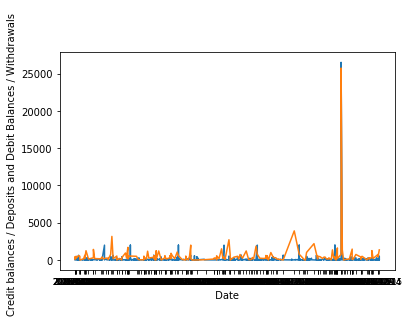

<Figure size 1440x720 with 0 Axes>

In [52]:

plt.plot( nf_2_debit["post_date"] ,nf_2_debit["amount"])
plt.plot( nf_2_credit["post_date"] ,nf_2_credit["amount"])
plt.xticks(nf_2_credit["post_date"], size = 8)
plt.xlabel(" Date ")
plt.ylabel("Credit balances / Deposits and Debit Balances / Withdrawals  ") 
plt.figure(figsize=(20,10))
plt.show()

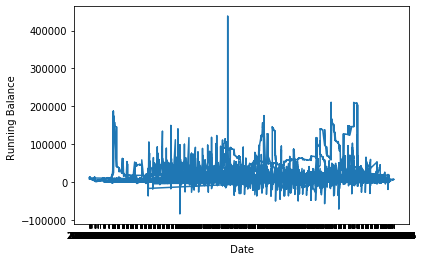

<Figure size 7200x720 with 0 Axes>

In [53]:
plt.plot( df["post_date"] ,df["running_balance"])
plt.xticks(df["post_date"], size = 8)
plt.xlabel(" Date ")
plt.ylabel("Running Balance ") 
plt.figure(figsize=(100,10))
plt.show()

Text(0.5, 1.0, 'Withdrawals and Deposits')

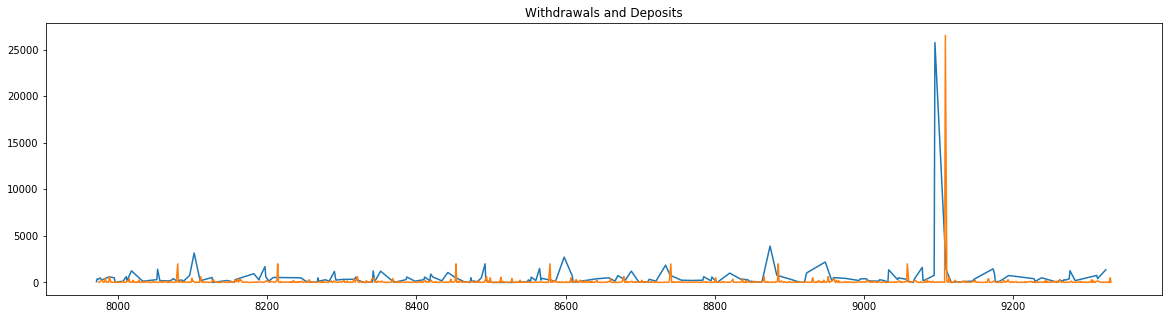

In [54]:
nf_2_credit.amount.plot(figsize = (20,5) ,title = "Credit amount /Deposits")
nf_2_debit.amount.plot(figsize = (20,5) ,title = "Debit amount / Withdrawls  ")

plt.title ( "Withdrawals and Deposits")

#### same for Lead_ID: 326062, bank_account_id : 14046

### 3. For the merchants with the above Lead_IDs, plot the withdrawals, deposits and daily balance as a daily time series (aggregate over all their bank accounts)														


In [55]:
nf_2_credit = nf_2[nf_2.transaction_type == "credit"]
nf_2_debit = nf_2[nf_2.transaction_type == "debit"]

In [56]:
nf_2_credit_date = nf_2_credit["post_date"].drop_duplicates()
nf_2_credit_date = pd.DataFrame(nf_2_credit_date)
nf_2_credit_date.head()

,post_date
7971,2016-04-12
7976,2016-04-13
7988,2016-04-15
7995,2016-04-16
8007,2016-04-19


#### we can easily see that the date column for the above and below tab is same 

In [57]:
agg_for_credit = nf_2_credit.groupby(["Lead_ID" ,"post_date" , "transaction_type"])[["amount"]].sum()
agg_for_credit.head(5)

amount
Lead_ID post_date  transaction_type        
318465  2016-04-12 credit            793.26
        2016-04-13 credit            737.30
        2016-04-15 credit            600.00
        2016-04-16 credit            501.49
        2016-04-19 credit            146.26

## We will do same for debit transactions 

In [58]:
nf_2_debit_date = nf_2_debit["post_date"].drop_duplicates()
nf_2_debit_date = pd.DataFrame(nf_2_debit_date)
nf_2_debit_date.head()

,post_date
7974,2016-04-12
7977,2016-04-13
7984,2016-04-14
7989,2016-04-15
7997,2016-04-16


In [59]:
agg_for_debit = nf_2_debit.groupby(["Lead_ID" ,"post_date" , "transaction_type"])[["amount"]].sum()
agg_for_debit.head(5)

amount
Lead_ID post_date  transaction_type        
318465  2016-04-12 debit              44.44
        2016-04-13 debit             975.95
        2016-04-14 debit              97.34
        2016-04-15 debit             787.37
        2016-04-16 debit              83.34

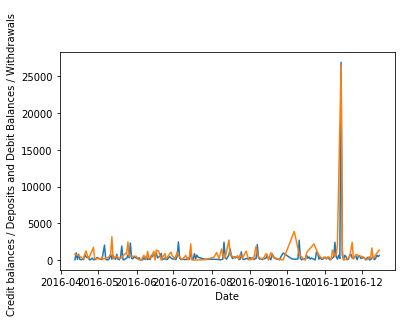

<Figure size 1440x720 with 0 Axes>

In [60]:
plt.plot( nf_2_debit_date["post_date"] ,agg_for_debit["amount"])
plt.plot( nf_2_credit_date["post_date"] ,agg_for_credit["amount"])
# plt.xticks(nf_2_credit["post_date"], size = 8)
plt.xlabel(" Date ")
plt.ylabel("Credit balances / Deposits and Debit Balances / Withdrawals  ") 
plt.figure(figsize=(20,10))
plt.show()

### 4. The cash flow of a business has many dimensions [for example, top 5 deposits/Total deposits,  average # of days between two withdrawals, coefficient of variation of the daily balance] that are potentially relevant to a borrower’s ability to repay. Can you obtain the value of these variables for each merchant? What other cash flow variables can you hypothesize that could be relevant for predicting merchant default? 
### What are some other dimensions that could be captured that could be predictive of risk?																		


In [61]:
df.head()

,Lead_ID,bankid,bank_account_id,account_number,Industry,post_date,description,transaction_type,amount,running_balance,trans_order,year,month,month_year
0,308148,8535,12460,xxxx9928,Accommodation and Food Services,2016-03-10,DEPOSIT ID NUMBER xx6836,credit,5000.00,5671.40,1,2016,3,2016-03
1,308148,8535,12460,xxxx9928,Accommodation and Food Services,2016-03-21,ATM CASH DEPOSIT 03/21 2904 N BELT LINE RD IRV...,credit,16.00,5687.40,1,2016,3,2016-03
2,308148,8535,12460,xxxx9928,Accommodation and Food Services,2016-03-21,ATM CASH DEPOSIT 03/21 2904 N BELT LINE RD IRV...,credit,1000.00,5671.90,3,2016,3,2016-03
3,308148,8535,12460,xxxx9928,Accommodation and Food Services,2016-03-21,WAL-MART #0880 IRVING TXxx6007 03/20,debit,1015.50,4671.90,2,2016,3,2016-03
4,308148,8535,12460,xxxx9928,Accommodation and Food Services,2016-03-22,CHECK OR SUPPLY ORDERPPD ID: xxxxxx6800,debit,27.62,5644.28,1,2016,3,2016-03


In [62]:
c_flow = df.groupby(["Lead_ID" ,"post_date" , "transaction_type"])[["amount"]].sum()
c_flow.head(20)

amount
Lead_ID post_date  transaction_type         
308148  2016-03-10 credit            5000.00
        2016-03-21 credit            1016.00
                   debit             1015.50
        2016-03-22 debit               27.62
        2016-03-23 debit                3.24
        2016-03-24 debit             1462.36
        2016-03-28 debit             1766.77
        2016-03-29 debit              643.18
        2016-03-30 credit              82.62
                   debit               76.65
        2016-04-04 debit               12.90
        2016-04-08 debit              262.39
        2016-04-11 debit              663.91
        2016-04-12 debit               33.02
        2016-04-13 debit               58.09
        2016-04-15 debit               15.40
        2016-04-18 debit               50.04
        2016-04-19 credit            1500.00
        2016-04-20 debit              800.00
        2016-04-21 debit              700.00

### Top Five Transactions

In [63]:
c_flow.nlargest(5, ['amount'])

amount
Lead_ID post_date  transaction_type           
321218  2016-07-01 debit             430483.27
                   credit            428900.53
325142  2017-01-18 debit             215352.72
330698  2016-04-18 credit            214643.80
                   debit             214643.80

### average # of days between two withdrawals

In [64]:
dfx = df[df.transaction_type == "debit"]  # withdrawal 

In [65]:
avg_of_days = dfx[["Lead_ID" ,"post_date" , "transaction_type"]].drop_duplicates()

In [66]:
avg_of_days.head(2)

,Lead_ID,post_date,transaction_type
3,308148,2016-03-21,debit
4,308148,2016-03-22,debit


In [67]:
avg_of_days.iloc[0]

Lead_ID                          308148
post_date           2016-03-21 00:00:00
transaction_type                  debit
Name: 3, dtype: object

In [68]:
def buildLaggedFeatures(s,lag=2,dropna=True):

    if type(s) is pd.DataFrame:
        new_dict={}
        for col_name in s:
            new_dict[col_name]=s[col_name]
            # create lagged Series
            for l in range(1,lag+1):
                new_dict['%s_lag%d' %(col_name,l)]=s[col_name].shift(l)
        res=pd.DataFrame(new_dict,index=s.index)

    elif type(s) is pd.Series:
        the_range=range(lag+1)
        res=pd.concat([s.shift(i) for i in the_range],axis=1)
        res.columns=['lag_%d' %i for i in the_range]
    else:
        print('Only works for DataFrame or Series')
        return None
    if dropna:
        return res.dropna()
    else:
        return res 

In [69]:
res2=buildLaggedFeatures(avg_of_days["post_date"],lag=1,dropna=True)
res2

,lag_0,lag_1
4,2016-03-22,2016-03-21
5,2016-03-23,2016-03-22
6,2016-03-24,2016-03-23
9,2016-03-28,2016-03-24
12,2016-03-29,2016-03-28
...,...,...
28985,2017-02-01,2017-01-31
28995,2017-02-02,2017-02-01
29005,2017-02-03,2017-02-02
29011,2017-02-06,2017-02-03


In [70]:
### Dropping the first row because we need to merge this two files 

In [71]:
avg_of_days.drop(avg_of_days.index[0])

,Lead_ID,post_date,transaction_type
4,308148,2016-03-22,debit
5,308148,2016-03-23,debit
6,308148,2016-03-24,debit
9,308148,2016-03-28,debit
12,308148,2016-03-29,debit
...,...,...,...
28985,330698,2017-02-01,debit
28995,330698,2017-02-02,debit
29005,330698,2017-02-03,debit
29011,330698,2017-02-06,debit


In [163]:
final_avg_of_days = pd.concat([avg_of_days, res2] , axis = 1)

In [164]:
xyz = final_avg_of_days.dropna()  ### Dropping null values 
xyz.head()

,Lead_ID,post_date,transaction_type,lag_0,lag_1
4,308148,2016-03-22,debit,2016-03-22,2016-03-21
5,308148,2016-03-23,debit,2016-03-23,2016-03-22
6,308148,2016-03-24,debit,2016-03-24,2016-03-23
9,308148,2016-03-28,debit,2016-03-28,2016-03-24
12,308148,2016-03-29,debit,2016-03-29,2016-03-28


In [165]:
### Getting a difference between two withdrawals 
xyz['Difference '] = xyz['lag_0'].sub(xyz['lag_1'], axis=0)
xyz.head()  

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Lead_ID,post_date,transaction_type,lag_0,lag_1,Difference
4,308148,2016-03-22,debit,2016-03-22,2016-03-21,1 days
5,308148,2016-03-23,debit,2016-03-23,2016-03-22,1 days
6,308148,2016-03-24,debit,2016-03-24,2016-03-23,1 days
9,308148,2016-03-28,debit,2016-03-28,2016-03-24,4 days
12,308148,2016-03-29,debit,2016-03-29,2016-03-28,1 days


In [166]:
xyz.head()

,Lead_ID,post_date,transaction_type,lag_0,lag_1,Difference
4,308148,2016-03-22,debit,2016-03-22,2016-03-21,1 days
5,308148,2016-03-23,debit,2016-03-23,2016-03-22,1 days
6,308148,2016-03-24,debit,2016-03-24,2016-03-23,1 days
9,308148,2016-03-28,debit,2016-03-28,2016-03-24,4 days
12,308148,2016-03-29,debit,2016-03-29,2016-03-28,1 days


In [167]:
xyz.shape

(3715, 6)

In [ ]:

basket = []
for i in range(len(xyz)):
    if xyz["Lead_ID"].iloc[i] != xyz["Lead_ID"].iloc[i+1]:
        basket.append(i+1)
    print(basket)
    
#### By running the above loop we will get basket list with index numbers of the data frame
#### where xyz["Lead_ID"].iloc[i] != xyz["Lead_ID"].iloc[i+1]  so for this rows we will drop such rows as date difference will be zero 
#### since those transaction belongs to different customers so taking date difference of two difference customers does not
#### make any sense
    


In [168]:
basket = [118, 226, 434, 612, 827, 941, 1184, 1423, 1562, 1779, 1999, 2204, 2407, 2530, 2668, 2800, 2914, 3125, 3299, 3477]
xyz_new = xyz.drop(xyz.index[basket])

xyz_new.head(20)

,Lead_ID,post_date,transaction_type,lag_0,lag_1,Difference
4,308148,2016-03-22,debit,2016-03-22,2016-03-21,1 days
5,308148,2016-03-23,debit,2016-03-23,2016-03-22,1 days
6,308148,2016-03-24,debit,2016-03-24,2016-03-23,1 days
9,308148,2016-03-28,debit,2016-03-28,2016-03-24,4 days
12,308148,2016-03-29,debit,2016-03-29,2016-03-28,1 days
19,308148,2016-03-30,debit,2016-03-30,2016-03-29,1 days
20,308148,2016-04-04,debit,2016-04-04,2016-03-30,5 days
21,308148,2016-04-08,debit,2016-04-08,2016-04-04,4 days
22,308148,2016-04-11,debit,2016-04-11,2016-04-08,3 days
26,308148,2016-04-12,debit,2016-04-12,2016-04-11,1 days


In [171]:
print(xyz.shape)
print(xyz_new.shape)

### SO finally we dropped 20 entries for which we got wrong date difference due to change in lead id .

(3715, 6)
(3695, 6)


### 5. Develop a program by which clusters of similar transactions for a merchant can be identified from transaction descriptions and other information See Example of such transactions on the right


In [75]:
df.head()

,Lead_ID,bankid,bank_account_id,account_number,Industry,post_date,description,transaction_type,amount,running_balance,trans_order,year,month,month_year
0,308148,8535,12460,xxxx9928,Accommodation and Food Services,2016-03-10,DEPOSIT ID NUMBER xx6836,credit,5000.00,5671.40,1,2016,3,2016-03
1,308148,8535,12460,xxxx9928,Accommodation and Food Services,2016-03-21,ATM CASH DEPOSIT 03/21 2904 N BELT LINE RD IRV...,credit,16.00,5687.40,1,2016,3,2016-03
2,308148,8535,12460,xxxx9928,Accommodation and Food Services,2016-03-21,ATM CASH DEPOSIT 03/21 2904 N BELT LINE RD IRV...,credit,1000.00,5671.90,3,2016,3,2016-03
3,308148,8535,12460,xxxx9928,Accommodation and Food Services,2016-03-21,WAL-MART #0880 IRVING TXxx6007 03/20,debit,1015.50,4671.90,2,2016,3,2016-03
4,308148,8535,12460,xxxx9928,Accommodation and Food Services,2016-03-22,CHECK OR SUPPLY ORDERPPD ID: xxxxxx6800,debit,27.62,5644.28,1,2016,3,2016-03


In [76]:
df.shape

(29029, 14)

In [77]:
for col in df[['Industry','description']]:
    df[col] = df[col].str.strip()
    print('Number of unique values in ' + str(col) +': ' + str(df[col].nunique()))

Number of unique values in Industry: 10
Number of unique values in description: 16338


In [78]:
unique_brand = df['description'].unique().tolist()
unique_brand[:20]   ### printing head 20 unique brands 


['DEPOSIT ID NUMBER xx6836',
 'ATM CASH DEPOSIT 03/21 2904 N BELT LINE RD IRVING TX',
 'WAL-MART #0880 IRVING TXxx6007 03/20',
 'CHECK OR SUPPLY ORDERPPD ID: xxxxxx6800',
 'DOLLARTREE LEAGUE CITY TXxx0062 03/23',
 'OREILLY AUTO xxxx4119 SEABROOKTX 03/23',
 'WITHDRAWAL',
 'WM SUPERCENTER # Wal-M LEAGUE CITY TXxx0557 03/24',
 'Wal-Mart Super Center FRIENDSWOOD TX xx9384 03/28',
 'Wal-Mart Super Center KEMAH TXxx4006 03/25',
 'CUISINE OF INDIA HOUSTON TX03/28',
 'THE HOME DEPOT 1853 LEAGUE CITYTX xx7917 03/29',
 'THE HOME DEPOT 1859 WEBSTER TXxx0383 03/29',
 'WM SUPERCENTER # Wal-M KEMAH TXxx4369 03/29',
 'MISCELLANEOUS FEE REVERSAL',
 'WM SUPERCENTER # Wal-M KEMAH TXxx4799 03/30',
 'CORNER STORE 2584 SEABROOK TX03/31',
 'THE HOME DEPOT 6560 KEMAH TXxx5030 04/08',
 'ATM WITHDRAWALxx2517 04/xx1441 W BA',
 'BOONDOGGLES PUB SEABROOK TX04/09']

In [79]:
!pip install bootstrap-difflib

In [80]:
import difflib

df['description'] = [(len(difflib.get_close_matches(x, df['description'], cutoff=0.7))>1)*1 
              for x in df['description']]

TypeError: object of type 'float' has no len()

In [ ]:

from string_grouper import match_strings, match_most_similar, group_similar_strings, StringGrouper
group_similar_strings(df['description'])

In [ ]:
!pip install string-grouper

In [ ]:
print(df["description"].head(10).stack())

In [ ]:
des_list = list(df["description"])

In [ ]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

df = pd.DataFrame(columns=["bank_account_id","description"], data=np.matrix(des_list))

corpus = list(df["description"].values)

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

threshold = 0.4

for x in range(0,X.shape[0]):
    for y in range(x,X.shape[0]):
 
        if(x!=y):
            if(cosine_similarity(X[x],X[y])>threshold):
                print(df["bank_account_id"][x],":",corpus[x])
                print(df["bank_account_id"][y],":",corpus[y])
                print("Cosine similarity:",cosine_similarity(X[x],X[y]))
                print()

In [ ]:
import nltk
nltk.download('punkt')

In [ ]:
from nltk.tokenize import TweetTokenizer

In [ ]:
!pip install tokenizer

In [ ]:
!pip install --user -U nltk

In [ ]:

des = pd.DataFrame(df['description'])
des.columns

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import pandas as pd
import nltk

documents = des.apply(nltk.sent_tokenize)    

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)
true_k = 50
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)
predict=model.predict(X)   
df['clusterGroup'] = Series(predict, index=X.index)